In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class CNNWith3Convs(nn.Module):
    def __init__(self):
        super(CNNWith3Convs, self).__init__()
        # 입력: (1, 28, 28)
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, padding=1)   # → (2, 28, 28)
        self.pool1 = nn.MaxPool2d(2, 2)                          # → (2, 14, 14)

        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, padding=1)   # → (4, 14, 14)
        self.pool2 = nn.MaxPool2d(2, 2)                          # → (4, 7, 7)

        self.conv3 = nn.Conv2d(4, 2, kernel_size=3, padding=1)   # → (2, 7, 7)
        self.pool3 = nn.MaxPool2d(1, 1)                          # (선택적)

        self.fc = nn.Linear(2 * 7 * 7, 10)

    def forward(self, x):
        self.feature1 = F.relu(self.conv1(x))  # (2, 28, 28)
        x = self.pool1(self.feature1)          # (2, 14, 14)

        self.feature2 = F.relu(self.conv2(x))  # (4, 14, 14)
        x = self.pool2(self.feature2)          # (4, 7, 7)

        self.feature3 = F.relu(self.conv3(x))  # (2, 7, 7)
        x = self.pool3(self.feature3)          # (2, 7, 7)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])

In [7]:
# MNIST 다운로드 및 데이터로더
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=1, shuffle=True)

In [8]:
# 모델 및 샘플 입력 준비
model = CNNWith3Convs()
img, label = next(iter(train_loader))
output = model(img)

print("예측 결과:", output.argmax().item())
print("모델 출력:", output)

예측 결과: 4
모델 출력: tensor([[ 0.0322, -0.0165, -0.0741,  0.0284,  0.2086, -0.0991, -0.1188,  0.0804,
         -0.1634, -0.0193]], grad_fn=<AddmmBackward0>)


In [9]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, title_prefix):
    num_channels = feature_maps.shape[1]
    plt.figure(figsize=(15, 4))
    for i in range(num_channels):
        plt.subplot(1, num_channels, i + 1)
        plt.imshow(feature_maps[0, i].detach().cpu().numpy(), cmap='gray')
        plt.title(f"{title_prefix} #{i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

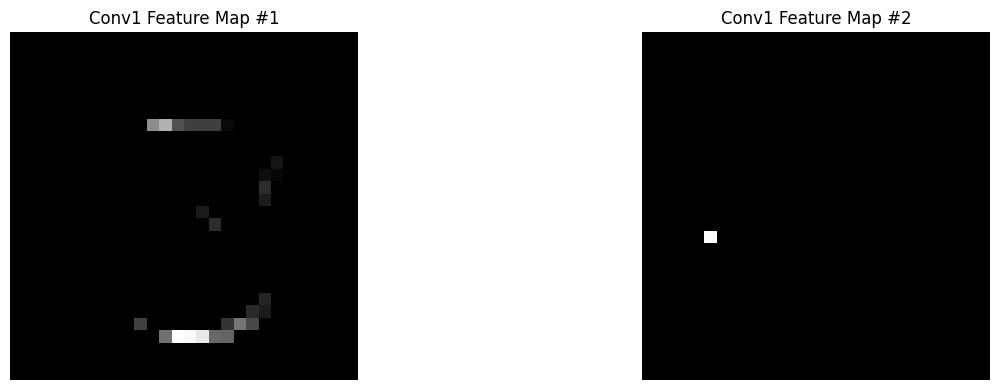

In [10]:
# Conv1 결과 시각화
plot_feature_maps(model.feature1, "Conv1 Feature Map")

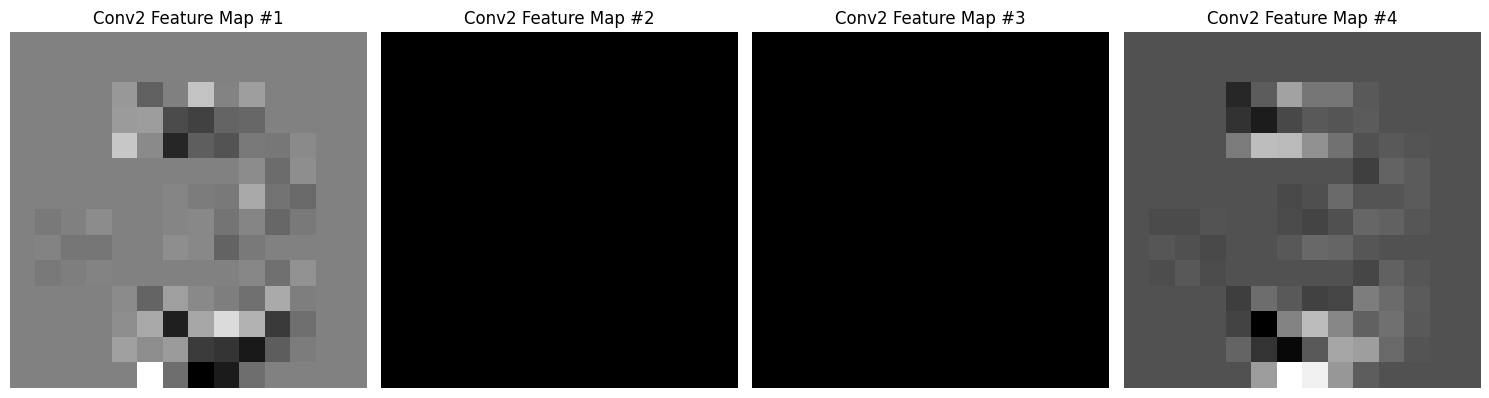

In [11]:
# Conv2 결과 시각화
plot_feature_maps(model.feature2, "Conv2 Feature Map")

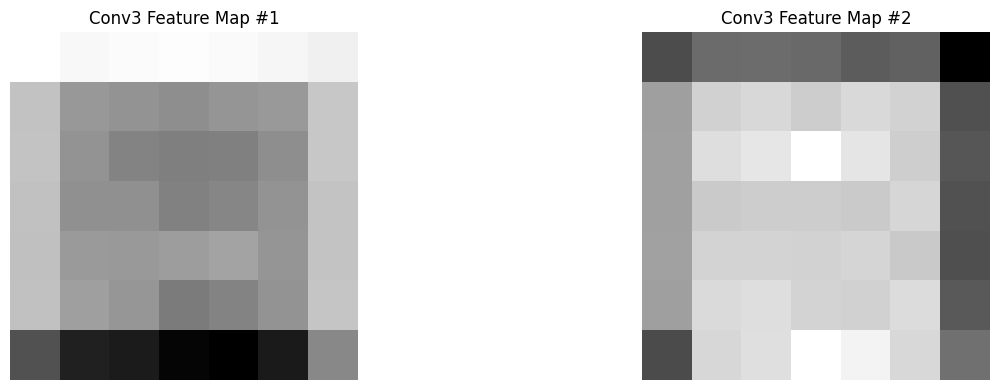

In [12]:
plot_feature_maps(model.feature3, "Conv3 Feature Map")